# Importing Needed Packages
We first import the necessary packages for our analysis of this dataset. The use of these will be explained later

In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.optimizers import SGD, Adam, RMSprop, Nadam
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.layers.core import Dense, Flatten, Activation, Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Importing Data and Preprocessing
The `Cifar-10` dataset is made readily available in the `keras.datasets` package

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 14s 0us/step


In [3]:
y_train.shape

(50000, 1)

In [4]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

As we can see the training data labels are single number arrays nested inside of a single array for each of the 50000 images

In [0]:
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

In [6]:
y_train.shape

(50000,)

In [7]:
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

We make use of the `reshape` function to convert the labels into a single array of integer labels

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Making use of the `np_utils` function `to_categorical` we convert the integer labels to one-hot encoding. This allows us to use `categorical_crossentropy` as our loss function in our training.

NB- if we had not done this we would have needed to use `sparse_categorical_crossentropy` as our loss function

In [10]:
x_train.shape

(50000, 32, 32, 3)

As we can see the training data consists of 32x32 pixel RGB images

In [11]:
x_train.max()

255

In [0]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

To aid training it is best to rescale the data to the 0 to 1 scale

# Sample Photo
A sample image is shown below to show the kind of images we are classifying

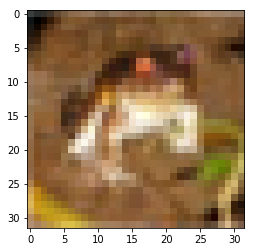

In [13]:
plt.imshow(x_train[0])

# Model Fitting
## Methodology
We will first explain the process we took to build our model. As a nod to the exceptional performance of the VGG-16 model of K. Simonyan and A. Zisserman we have used a similar architecture for our first block of layers, that is 3 convolutional layers followed by a max pooling layer to down sample the image and reduce computational overhead. To reduce overfitting our model we follow the max pooling layer up with a drop-out layer which randomly turns off a portion of neurons, thus forcing the the model to form new and more meaningful pathways. We make of rectified linear units (ReLU) for our activation function in  the convolutional layers as these have shown great promise in practice as shown in Xavier Glorot, et al. Following these layers we have flattened the output, i.e. made the output 1 dimensional in preparation for our fully connected, or dense layers. We have added 1 dense layer prior to the final output to help collect all of the our previously filtered data, we have also used a ReLU activation as well. Finally we have out the the results using a softmax function so as to provide class labels.

We have decided to use categorical cross-entropy as our loss function to minimise as we have a classification problem. We will use Stochastic Gradient Descent (SGD) for our optimisation. We are interested in how well our model performs at correctly classifying each image, a lower missclassification rate usually indicates a better model should it not be overfit. For this reason it is important to look at the accuracy of the model and use this as our error metric.

We have decided to update the weights in the network after 10 images have been through the model as this does not have the computational overhead of updating after each image and is most likely fine grain enough where it will not effect optimisation. We have allowed the model to have 20 passes or epochs through the data. To combat overfitting we have reserved 10% of the data for validation to assess the performance on unseen data.

## Naive Approach

In [14]:
model1 = Sequential()
model1.add(Conv2D(32, (2, 2), input_shape=(32, 32, 3), activation='relu'))
model1.add(Conv2D(32, (2, 2), activation='relu'))
model1.add(Conv2D(32, (2, 2), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer="SGD", metrics=['accuracy'])
print(model1.summary())

mod_fit = model1.fit(
    x_train,
    Y_train,
    batch_size=10,
    epochs=20,
    validation_split = .1,
    shuffle=True
)

W0816 11:29:43.468699 139882748557184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0816 11:29:43.510008 139882748557184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0816 11:29:43.519393 139882748557184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0816 11:29:43.572306 139882748557184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0816 11:29:43.574807 139882748557184 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 31, 32)        416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        4128      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
__________

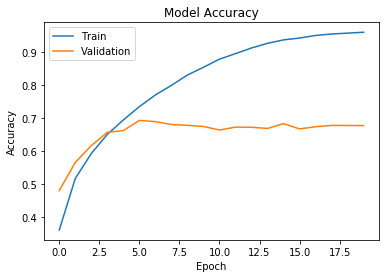

In [15]:
plt.plot(mod_fit.history['acc'])
plt.plot(mod_fit.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

As we can see the model performs quite well and increases in validation accuracy until about the sixth epoch at which the validation accuracy seems to plateau. As a good example of overfitting the training accuracy increases as we would expect.

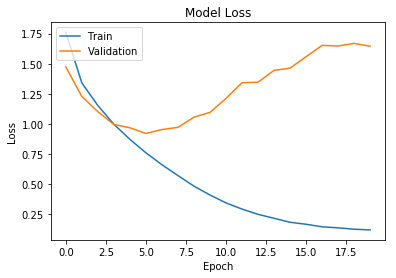

In [16]:
plt.plot(mod_fit.history['loss'])
plt.plot(mod_fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Similar to the accuracy plot above we can see that the loss appears to be monotonically decreasing for training data, but the loss on validation data makes a tell tale U shape indicating that the model is overfitting after the sixth epoch or so.

## Hyperparameter Tuning

Before assessing the model any further we should do some hyperparameter tuning to make sure our output is as optimal as possible. Lookin at the model we have decided to tune the following:

*   optimiser for our analysis (`OP`)
 *   We will consider the `Adam` and `SGD` optimisers
*   number of nodes in our first dense layer (`DL`)
 *  We will consider `64`, and `128`
*   number of epochs (`EP`)
 *   We will consider `5` and `10` epochs


To do this we will be using a naive grid search approach and doing all of the `2*2*2 = 8` permutations

We are tuning the optimiser in case it is not as suited as others. We are tuning the number of nodes in the dense layer as we simply guessed initially at an appropriate number. Finally as we can see the number of epochs needed seems to be less than 20 and thus it would be useful to know a more appropriate number for application.

###  OP=`Adam`, DL=`64`, EP=`5`

In [18]:
model2 = Sequential()
model2.add(Conv2D(32, (2, 2), input_shape=(32, 32, 3), activation='relu'))
model2.add(Conv2D(32, (2, 2), activation='relu'))
model2.add(Conv2D(32, (2, 2), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

mod_fit2 = model2.fit(
    x_train,
    Y_train,
    batch_size=10,
    epochs=5,
    validation_split = .1,
    shuffle=True
)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
45000/45000 [==============================] - 22s 478us/step - loss: 1.4412 - acc: 0.4816 - val_loss: 1.1274 - val_acc: 0.6008
Epoch 2/5
45000/45000 [==============================] - 21s 466us/step - loss: 1.0477 - acc: 0.6328 - val_loss: 0.9962 - val_acc: 0.6534
Epoch 3/5
45000/45000 [==============================] - 21s 467us/step - loss: 0.9237 - acc: 0.6772 - val_loss: 0.9180 - val_acc: 0.6798
Epoch 4/5
45000/45000 [==============================] - 21s 467us/step - loss: 0.8360 - acc: 0.7066 - val_loss: 0.9262 - val_acc: 0.6734
Epoch 5/5
45000/45000 [==============================] - 21s 466us/step - loss: 0.7654 - acc: 0.7344 - val_loss: 1.0098 - val_acc: 0.6534


### OP=`SGD`, DL=`64`,  EP=`5`

In [19]:
model3 = Sequential()
model3.add(Conv2D(32, (2, 2), input_shape=(32, 32, 3), activation='relu'))
model3.add(Conv2D(32, (2, 2), activation='relu'))
model3.add(Conv2D(32, (2, 2), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer="SGD", metrics=['accuracy'])

mod_fit3 = model3.fit(
    x_train,
    Y_train,
    batch_size=10,
    epochs=5,
    validation_split = .1,
    shuffle=True
)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
45000/45000 [==============================] - 18s 401us/step - loss: 1.7879 - acc: 0.3559 - val_loss: 1.4820 - val_acc: 0.4694
Epoch 2/5
45000/45000 [==============================] - 18s 393us/step - loss: 1.4138 - acc: 0.4928 - val_loss: 1.3107 - val_acc: 0.5312
Epoch 3/5
45000/45000 [==============================] - 18s 395us/step - loss: 1.2303 - acc: 0.5582 - val_loss: 1.1593 - val_acc: 0.5858
Epoch 4/5
45000/45000 [==============================] - 18s 392us/step - loss: 1.1007 - acc: 0.6099 - val_loss: 1.1243 - val_acc: 0.6014
Epoch 5/5
45000/45000 [==============================] - 18s 390us/step - loss: 0.9980 - acc: 0.6470 - val_loss: 1.0267 - val_acc: 0.6446


### OP=`Adam`, DL=`128`,  EP=`5`

In [22]:
model5 = Sequential()
model5.add(Conv2D(32, (2, 2), input_shape=(32, 32, 3), activation='relu'))
model5.add(Conv2D(32, (2, 2), activation='relu'))
model5.add(Conv2D(32, (2, 2), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.2))
model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dense(10, activation='softmax'))

model5.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

mod_fit5 = model5.fit(
    x_train,
    Y_train,
    batch_size=10,
    epochs=5,
    validation_split = .1,
    shuffle=True
)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
45000/45000 [==============================] - 22s 497us/step - loss: 1.3596 - acc: 0.5102 - val_loss: 1.0841 - val_acc: 0.6138
Epoch 2/5
45000/45000 [==============================] - 22s 481us/step - loss: 0.9662 - acc: 0.6604 - val_loss: 0.9097 - val_acc: 0.6812
Epoch 3/5
45000/45000 [==============================] - 22s 484us/step - loss: 0.7817 - acc: 0.7245 - val_loss: 0.9050 - val_acc: 0.6908
Epoch 4/5
45000/45000 [==============================] - 22s 483us/step - loss: 0.6491 - acc: 0.7700 - val_loss: 0.9078 - val_acc: 0.6982
Epoch 5/5
45000/45000 [==============================] - 22s 480us/step - loss: 0.5284 - acc: 0.8121 - val_loss: 0.8933 - val_acc: 0.7102


### OP=`SGD`, DL=`128`,  EP=`5`

In [21]:
model4 = Sequential()
model4.add(Conv2D(32, (2, 2), input_shape=(32, 32, 3), activation='relu'))
model4.add(Conv2D(32, (2, 2), activation='relu'))
model4.add(Conv2D(32, (2, 2), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.2))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dense(10, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer="SGD", metrics=['accuracy'])

mod_fit4 = model4.fit(
    x_train,
    Y_train,
    batch_size=10,
    epochs=5,
    validation_split = .1,
    shuffle=True
)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
45000/45000 [==============================] - 19s 415us/step - loss: 1.8048 - acc: 0.3513 - val_loss: 1.5443 - val_acc: 0.4478
Epoch 2/5
45000/45000 [==============================] - 18s 400us/step - loss: 1.4444 - acc: 0.4818 - val_loss: 1.3214 - val_acc: 0.5216
Epoch 3/5
45000/45000 [==============================] - 18s 400us/step - loss: 1.2551 - acc: 0.5511 - val_loss: 1.1669 - val_acc: 0.5830
Epoch 4/5
45000/45000 [==============================] - 18s 400us/step - loss: 1.0926 - acc: 0.6122 - val_loss: 1.0896 - val_acc: 0.6132
Epoch 5/5
45000/45000 [==============================] - 18s 402us/step - loss: 0.9564 - acc: 0.6610 - val_loss: 1.0179 - val_acc: 0.6372


### OP=`Adam`, DL=`64`,  EP=`10`

In [25]:
model6 = Sequential()
model6.add(Conv2D(32, (2, 2), input_shape=(32, 32, 3), activation='relu'))
model6.add(Conv2D(32, (2, 2), activation='relu'))
model6.add(Conv2D(32, (2, 2), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.2))
model6.add(Flatten())
model6.add(Dense(64, activation='relu'))
model6.add(Dense(10, activation='softmax'))

model6.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

mod_fit6 = model6.fit(
    x_train,
    Y_train,
    batch_size=10,
    epochs=10,
    validation_split = .1,
    shuffle=True
)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 23s 516us/step - loss: 1.4035 - acc: 0.4940 - val_loss: 1.1255 - val_acc: 0.6010
Epoch 2/10
45000/45000 [==============================] - 22s 485us/step - loss: 1.0435 - acc: 0.6305 - val_loss: 1.0036 - val_acc: 0.6434
Epoch 3/10
45000/45000 [==============================] - 22s 487us/step - loss: 0.9063 - acc: 0.6823 - val_loss: 0.9613 - val_acc: 0.6620
Epoch 4/10
45000/45000 [==============================] - 22s 484us/step - loss: 0.8189 - acc: 0.7109 - val_loss: 0.9631 - val_acc: 0.6616
Epoch 5/10
45000/45000 [==============================] - 22s 493us/step - loss: 0.7419 - acc: 0.7405 - val_loss: 0.9256 - val_acc: 0.6840
Epoch 6/10
45000/45000 [==============================] - 22s 484us/step - loss: 0.6777 - acc: 0.7600 - val_loss: 0.9575 - val_acc: 0.6724
Epoch 7/10
45000/45000 [==============================] - 22s 484us/step - loss: 0.6215 - acc: 0.7803 - val_loss: 0.9

### OP=`SGD`, DL=`64`,  EP=`10`

In [26]:
model7 = Sequential()
model7.add(Conv2D(32, (2, 2), input_shape=(32, 32, 3), activation='relu'))
model7.add(Conv2D(32, (2, 2), activation='relu'))
model7.add(Conv2D(32, (2, 2), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.2))
model7.add(Flatten())
model7.add(Dense(64, activation='relu'))
model7.add(Dense(10, activation='softmax'))

model7.compile(loss='categorical_crossentropy', optimizer="SGD", metrics=['accuracy'])

mod_fit7 = model7.fit(
    x_train,
    Y_train,
    batch_size=10,
    epochs=10,
    validation_split = .1,
    shuffle=True
)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 19s 424us/step - loss: 1.8112 - acc: 0.3501 - val_loss: 1.5752 - val_acc: 0.4340
Epoch 2/10
45000/45000 [==============================] - 18s 404us/step - loss: 1.4108 - acc: 0.4915 - val_loss: 1.2415 - val_acc: 0.5488
Epoch 3/10
45000/45000 [==============================] - 18s 403us/step - loss: 1.1862 - acc: 0.5768 - val_loss: 1.1240 - val_acc: 0.5970
Epoch 4/10
45000/45000 [==============================] - 18s 402us/step - loss: 1.0365 - acc: 0.6319 - val_loss: 1.0377 - val_acc: 0.6308
Epoch 5/10
45000/45000 [==============================] - 18s 404us/step - loss: 0.9182 - acc: 0.6779 - val_loss: 0.9987 - val_acc: 0.6480
Epoch 6/10
45000/45000 [==============================] - 18s 407us/step - loss: 0.8273 - acc: 0.7055 - val_loss: 0.9887 - val_acc: 0.6580
Epoch 7/10
45000/45000 [==============================] - 18s 402us/step - loss: 0.7422 - acc: 0.7376 - val_loss: 0.9

### OP=`Adam`, DL=`128`,  EP=`10`

In [27]:
model8 = Sequential()
model8.add(Conv2D(32, (2, 2), input_shape=(32, 32, 3), activation='relu'))
model8.add(Conv2D(32, (2, 2), activation='relu'))
model8.add(Conv2D(32, (2, 2), activation='relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.2))
model8.add(Flatten())
model8.add(Dense(128, activation='relu'))
model8.add(Dense(10, activation='softmax'))

model8.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

mod_fit8 = model8.fit(
    x_train,
    Y_train,
    batch_size=10,
    epochs=10,
    validation_split = .1,
    shuffle=True
)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 23s 517us/step - loss: 1.3532 - acc: 0.5159 - val_loss: 1.0800 - val_acc: 0.6226
Epoch 2/10
45000/45000 [==============================] - 22s 482us/step - loss: 0.9933 - acc: 0.6508 - val_loss: 1.0196 - val_acc: 0.6438
Epoch 3/10
45000/45000 [==============================] - 22s 484us/step - loss: 0.8480 - acc: 0.7018 - val_loss: 0.9382 - val_acc: 0.6774
Epoch 4/10
45000/45000 [==============================] - 22s 482us/step - loss: 0.7232 - acc: 0.7453 - val_loss: 0.9422 - val_acc: 0.6886
Epoch 5/10
45000/45000 [==============================] - 22s 480us/step - loss: 0.6214 - acc: 0.7799 - val_loss: 0.9547 - val_acc: 0.6814
Epoch 6/10
45000/45000 [==============================] - 22s 480us/step - loss: 0.5241 - acc: 0.8134 - val_loss: 1.0472 - val_acc: 0.6726
Epoch 7/10
45000/45000 [==============================] - 22s 483us/step - loss: 0.4483 - acc: 0.8421 - val_loss: 1.0

As we can see `Adam` seems to be the better optimiser to use and we should use `128` fully connected nodes.

##  Changing the Architecture

As we know the VGG-16 model uses multiple blocks of convolutional layers, using our knowledge of this we suspect that adding additional blocks might improve validation accuracy. With this in mind we build a new model below. The VGG-16 model doubles the number of nodes in the convolutional layers as the number of blocks increases. For this reason we will do the same.

In [29]:
model_new_arch = Sequential()
model_new_arch.add(Conv2D(32, (2, 2), input_shape=(32, 32, 3), activation='relu'))
model_new_arch.add(Conv2D(32, (2, 2), activation='relu'))
model_new_arch.add(Conv2D(32, (2, 2), activation='relu'))
model_new_arch.add(MaxPooling2D(pool_size=(2, 2)))
model_new_arch.add(Dropout(0.2))
model_new_arch.add(Conv2D(64, (2, 2), input_shape=(32, 32, 3), activation='relu'))
model_new_arch.add(Conv2D(64, (2, 2), activation='relu'))
model_new_arch.add(Conv2D(64, (2, 2), activation='relu'))
model_new_arch.add(MaxPooling2D(pool_size=(2, 2)))
model_new_arch.add(Dropout(0.2))
model_new_arch.add(Flatten())
model_new_arch.add(Dense(128, activation='relu'))
model_new_arch.add(Dense(10, activation='softmax'))

model_new_arch.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

mod_fit_new_arch = model_new_arch.fit(
    x_train,
    Y_train,
    batch_size=10,
    epochs=20,
    validation_split = .1,
    shuffle=True
)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 30s 668us/step - loss: 1.6239 - acc: 0.4058 - val_loss: 1.3494 - val_acc: 0.5108
Epoch 2/20
45000/45000 [==============================] - 28s 629us/step - loss: 1.2575 - acc: 0.5496 - val_loss: 1.0874 - val_acc: 0.6152
Epoch 3/20
45000/45000 [==============================] - 28s 628us/step - loss: 1.0920 - acc: 0.6116 - val_loss: 0.9767 - val_acc: 0.6552
Epoch 4/20
45000/45000 [==============================] - 28s 631us/step - loss: 0.9928 - acc: 0.6503 - val_loss: 0.9227 - val_acc: 0.6760
Epoch 5/20
45000/45000 [==============================] - 28s 630us/step - loss: 0.9182 - acc: 0.6774 - val_loss: 0.9335 - val_acc: 0.6818
Epoch 6/20
45000/45000 [==============================] - 28s 628us/step - loss: 0.8640 - acc: 0.6949 - val_loss: 0.8670 - val_acc: 0.6984
Epoch 7/20
45000/45000 [==============================] - 28s 628us/step - loss: 0.8237 - acc: 0.7104 - val_loss: 0.8

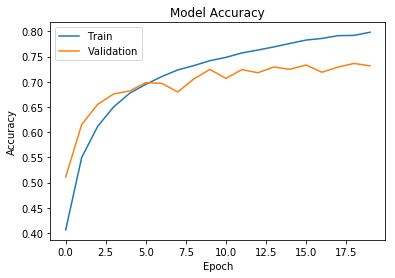

In [30]:
plt.plot(mod_fit_new_arch.history['acc'])
plt.plot(mod_fit_new_arch.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

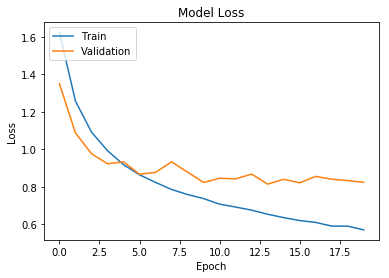

In [31]:
plt.plot(mod_fit_new_arch.history['loss'])
plt.plot(mod_fit_new_arch.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

As we can see simply adding another block of convolutional layers has had a significant impact on the validation accuracy and overfitting. After running this model for 20 epochs we have increased the accuracy by about 5% over the single block of convolutional layers. It appears that at around 10 epochs the validation accuracy plateaus. We will stop here, but we hypothesise that adding additional blocks of convolutional layers would increase the accuracy further.

#  Selected Model's Performance

As we saw above the model accuracy on training data was about `79.8%`after 20 epochs and the model accuracy on validation data was about `73.2%` after 20 epochs. We would also like to know how the selected model performs on the test data we were given as well. We do this below.

In [33]:
model_new_arch.evaluate(x_test, Y_test, batch_size=10)

10000/10000 [==============================] - 2s 236us/step


[0.8461520169116556, 0.7276000004857779]

The first number output by evaluate is the loss, followed by the accuracy. Thus we can see that our model is about `72.8%`accurate on the test data which it has never seen. This is quite good. We are interested in seeing which classes it had the biggest problems with by creating a confusion matrix below.

In [0]:
predictions = model_new_arch.predict(x_test)
y_pred = np.argmax(predictions,axis=1)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
confusion_matrix(y_test,y_pred)

array([[733,  26,  65,  23,  27,   3,  11,  12,  73,  27],
       [ 11, 847,   8,   6,   5,   4,  12,   5,  23,  79],
       [ 53,   5, 569,  55, 129,  47,  95,  25,  13,   9],
       [ 21,   5,  64, 511, 102, 150,  84,  30,  18,  15],
       [ 19,   0,  34,  47, 753,  24,  49,  61,   6,   7],
       [ 15,   2,  52, 167,  69, 598,  41,  47,   3,   6],
       [  1,   4,  35,  33,  45,  18, 848,   6,   4,   6],
       [ 17,   3,  19,  47,  73,  49,  15, 760,   4,  13],
       [ 56,  30,  19,  19,   5,   6,   7,   7, 818,  33],
       [ 29,  59,   4,  14,   8,   4,   7,  10,  26, 839]])

As we can see the model is far from perfect and seems to perform better on classes 1 and 6 then is does on class 3 for instance. For a better understanding of this we should look at the precision and recall for each class. We should also recall what each class is meant to be. From the `CIFAR-10` information page we know that the following labels are associated with the following objects.



0. airplane
1. automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck



In [0]:
target_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [45]:
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

    airplane       0.77      0.73      0.75      1000
  automobile       0.86      0.85      0.86      1000
        bird       0.65      0.57      0.61      1000
         cat       0.55      0.51      0.53      1000
        deer       0.62      0.75      0.68      1000
         dog       0.66      0.60      0.63      1000
        frog       0.73      0.85      0.78      1000
       horse       0.79      0.76      0.77      1000
        ship       0.83      0.82      0.82      1000
       truck       0.81      0.84      0.82      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



The precision is the percentage of images classified as the a particular class that are truly that class. The recall is the percentage of correctly labeled items out of all of the items truly of that class (correctly or incorrectly labeled). Of course it is best to have both of these metrics as high as possible. The F1 score that is reported is the harmonic mean of recall and percision.

As we said before our model seems to do quite well on images of automobiles, ships, and trucks. It seems to do reasonably well on images of airplanes frogs, and horses. It appears to perform poorly on images of cats, deer, birds and dogs. It is interesting that the animals are the hardest for the classifier to correctly label. This could be due to the difference in variation of photos of airplanes vs cats for instance that the model as seen.

In conclusion this model is good for basic classification, for better accuracy we suggest using existing models like ResNet or VGG as our models are unlikely to rival them for general purpose classification.